# Advanced Pandas Exercise

<font color='Blue'>Motivation</font>: 发现每次用 pandas df 的时候，都需要查，这个在一些简单的情况下是可以的, 但是在需要比较复杂 data analysis and data investigation 的情况下，需要同时想一个 plan 的同时，如果没有熟悉 pandas dataframe on the back of my hand, 就会非常糟糕， 比如 model debug, 比如人家问你某个数据为啥这样，或者你需要 model output 读出来做各种 grouping 处理之后的图. 所以这个notebook 一来为了熟悉一些 advanced API, 还有就是<font color='green'>__要练习到这些 API 不用查，就会写__</font>。


<img src="pandas_img.png" alt="pandas image" style="height: 200px; width:400px;"/>

__Referece__:
- https://towardsai.net/p/data-science/pandas-complete-tutorial-for-data-science-in-2022
- https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/
- [Pandas实战进阶](https://www.bilibili.com/video/BV1Hh411D7WG?p=3&vd_source=5c8b5c9867107d469df779b209ba94ed) (这个课非常好，代码在这 github [link](https://github.com/peiss))

几个要学的和常用的点几一下:
- 怎么 select column(s)
- 怎么 filter
- 怎么 grouping (然后 sum 或者用 udwf， 然后这里还有个 transform 或者 lambda 咋用?)
- 怎么 withColumn 加一个 new column based on existing value
- 怎么 manipulate index
- 怎么 join
- 什么是 merge

In [2]:
!pwd

/Users/qizhong/Downloads/Learning_Pandas


In [70]:
import numpy as np
import pandas as pd

In [4]:
pd.set_option('display.min_rows', 10) #default will be 10 
pd.set_option('display.max_columns', 20)

In [5]:
!ls dataset

online_store_customer_data.csv


In [42]:
df = pd.read_csv('dataset/online_store_customer_data.csv')

In [43]:
df.head()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN


In [44]:
df.dtypes

Transaction_date     object
Transaction_ID        int64
Gender               object
Age                 float64
Marital_status       object
State_names          object
Segment              object
Employees_status     object
Payment_method       object
Referal             float64
Amount_spent        float64
dtype: object

In [45]:
df.describe()

,Transaction_ID,Age,Referal,Amount_spent
count,2512.000000,2470.000000,2357.000000,2270.000000
mean,152443.931131,46.637652,0.652100,1418.422577
std,724.580482,18.186277,0.476405,878.507451
min,151200.000000,15.000000,0.000000,2.090000
25%,151815.750000,32.000000,0.000000,678.192500
50%,152443.500000,47.000000,1.000000,1341.435000
75%,153071.250000,62.000000,1.000000,2038.102500
max,153699.000000,78.000000,1.000000,2999.980000


## Selection of Column(s)

In [46]:
# select one column 
print(df['Transaction_date'])

# select multiple cols (需要双 bracket, 因为外面的bracket是表示select 里面的bracket 是提供 list)
df[['Transaction_date', 'Gender', 'Age']]

0       1/1/2019
1       1/1/2019
2       1/1/2019
3       1/1/2019
4       1/1/2019
          ...   
2507    5/1/2021
2508    5/1/2021
2509    5/1/2021
2510    5/1/2021
2511    5/1/2021
Name: Transaction_date, Length: 2512, dtype: object


,Transaction_date,Gender,Age
0,1/1/2019,Female,19.0
1,1/1/2019,Male,49.0
2,1/1/2019,Male,63.0
3,1/1/2019,NaN,18.0
4,1/1/2019,Male,27.0
...,...,...,...
2507,5/1/2021,Female,57.0
2508,5/1/2021,Female,36.0
2509,5/1/2021,Male,22.0
2510,5/1/2021,NaN,44.0


## Filter of Column(s)

In [47]:
# filter. (好像有好几种办法，用 loc 和不用， 记一个最顺手的吧)

# Method 1: use "[]"" as select and put what ever condition in there. 这里如果多个 condition, 那么需要用括号， 
#   这个我觉得先不写括号，然后后面再加会比较容易不出错

df[ (df['Gender'] == 'Male') & (df['Age'] < 30) ]

# df[ (df.Gender == 'Male') & (df.Age < 30) ]  # 里面的 condition 用 "." 也可以，而且我觉得更简洁

# Method 2: use ".loc"  (我觉得方法 1 号，你这里多写一个 loc 也没啥用.. ). 但是看了下 df.loc[] 更多是为了 access rows 而不是 columns
# 当然, loc 还有个好处，就是可以 inplace replace columns

df.loc[ (df['Gender'] == 'Male') & (df['Age'] < 30) ]

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN
14,1/5/2019,151214,Male,24.0,Married,Colorado,Platinum,self-employed,Other,1.0,954.12
15,1/6/2019,151215,Male,16.0,Single,New York,Platinum,workers,Other,1.0,1005.92
25,1/11/2019,151225,Male,25.0,Married,Indiana,Basic,self-employed,Other,1.0,1514.75
30,1/12/2019,151230,Male,17.0,Married,Maine,Basic,Employees,PayPal,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2462,4/15/2021,153650,Male,25.0,Married,Texas,Basic,workers,PayPal,0.0,2013.54
2465,4/16/2021,153653,Male,25.0,Married,Utah,Basic,Employees,PayPal,1.0,1367.59
2474,4/19/2021,153662,Male,15.0,Married,Washington,Basic,Employees,PayPal,1.0,1285.46
2502,4/29/2021,153690,Male,16.0,Single,Louisiana,Basic,self-employed,PayPal,0.0,1171.23


## Grouping and Agg or use User Defined Window Func

In [48]:
# Method 1: 
# 它这里的结构是: ".groupby()" 这里选出你要 gorup 的 columns, 然后后面接着用 "[]" 来表示 selection
# 但是这里只会返回给你一个 SeriesGroupBy datatype, 你还要告诉 Pandas 你要怎么 grouping. 所以加了一个 mean()
df.groupby('Gender')['Age'].mean()
df.groupby(['Gender', 'Segment'])[['Age', 'Amount_spent']].mean() # 这里也可以groupy by 多个 key, 和 agg by 多个key

Age  Amount_spent
Gender Segment                          
Female Basic     47.524046   1419.099214
       Gold      46.646617   1421.593360
       Missing   46.585106   1539.036333
       Platinum  47.012876   1413.755933
       Silver    45.429658   1428.105150
Male   Basic     46.812375   1410.688611
       Gold      47.943396   1327.625326
       Missing   48.474227   1316.195604
       Platinum  44.350000   1499.092155
       Silver    46.037736   1396.263897

In [49]:
# Method 2:
#基本跟上面一样，但是用 .agg()

# how to filter, and ground by and count and count distinct?

# 还有怎么 group by multiple columns 或者像sql 那样  max(), min(), avg() 可以一起apply

# 这里就是 select multiple column 然后 apply multiple aggregator
df.groupby(['Gender', 'Segment'])[['Age', 'Amount_spent']].agg(['min', 'max'])

Age       Amount_spent         
                  min   max          min      max
Gender Segment                                   
Female Basic     15.0  78.0         5.31  2985.70
       Gold      15.0  78.0         2.09  2971.30
       Missing   15.0  78.0        27.00  2959.54
       Platinum  15.0  78.0        28.27  2999.98
       Silver    15.0  78.0         2.84  2997.21
Male   Basic     15.0  78.0        20.77  2996.82
       Gold      15.0  78.0         2.16  2998.62
       Missing   15.0  78.0        56.13  2997.15
       Platinum  15.0  78.0        44.75  2995.73
       Silver    15.0  78.0         5.55  2987.96

In [58]:
# 这里是 select multipel column 但是apply 不一样的 aggregator, 这里就是在 agg() 里面用 dictionary 而不是直接 list
df.groupby(['Gender', 'Segment'])[['Age', 'Amount_spent']] \
    .agg({'Age': 'min', 'Amount_spent': ['min', 'max']})

Age Amount_spent         
                  min          min      max
Gender Segment                             
Female Basic     15.0         5.31  2985.70
       Gold      15.0         2.09  2971.30
       Missing   15.0        27.00  2959.54
       Platinum  15.0        28.27  2999.98
       Silver    15.0         2.84  2997.21
Male   Basic     15.0        20.77  2996.82
       Gold      15.0         2.16  2998.62
       Missing   15.0        56.13  2997.15
       Platinum  15.0        44.75  2995.73
       Silver    15.0         5.55  2987.96

In [51]:
# Question: how to apply customer aggregator? 
#     A: 就是直接一样的 dictionary 里面 key 是要 agg 的column, val 是 agg func
#         比如这里对selected colum 进行 agg func 
#           agg({'Age': f, 'Amount_spent': ['min', 'max']}) \
# 
# how to rename aggregated column 
#     A: .set_axis(['one', 'two', 'test2'], axis=1)   用这个
# Ref: https://stackoverflow.com/questions/30718231/aggregating-in-pandas-groupby-using-lambda-functions

# this function takes in a series
f = lambda x: x.max() - x.min()

df.groupby(['Gender', 'Segment'])[['Age', 'Amount_spent']] \
    .agg({'Age': f, 'Amount_spent': ['min', 'max']}) \
    .set_axis(['age_diff', 'min_amt_spent', 'max_amt_spent'], axis=1) \
    .reset_index()

,Gender,Segment,age_diff,min_amt_spent,max_amt_spent
0,Female,Basic,63.0,5.31,2985.70
1,Female,Gold,63.0,2.09,2971.30
2,Female,Missing,63.0,27.00,2959.54
3,Female,Platinum,63.0,28.27,2999.98
4,Female,Silver,63.0,2.84,2997.21
5,Male,Basic,63.0,20.77,2996.82
6,Male,Gold,63.0,2.16,2998.62
7,Male,Missing,63.0,56.13,2997.15
8,Male,Platinum,63.0,44.75,2995.73
9,Male,Silver,63.0,5.55,2987.96


In [52]:
# how to use sequeeze

In [67]:
# how to group by and show distinct?  
# A: 用 'unique' 在 agg func 里面, 然后 unique cnt 就用 'nunique'
df.groupby(['Gender', 'Segment'])[['Age', 'Amount_spent']] \
    .agg({'Age': f, 'Amount_spent': ['min', 'max', 'nunique', 'unique']}) \
    .set_axis(['age_diff', 'min_amt_spent', 'max_amt_spent', 'unique_cnt','unique_spent_list'], axis=1)

age_diff  min_amt_spent  max_amt_spent  unique_cnt  \
Gender Segment                                                        
Female Basic         63.0           5.31        2985.70         558   
       Gold          63.0           2.09        2971.30         124   
       Missing       63.0          27.00        2959.54          89   
       Platinum      63.0          28.27        2999.98         208   
       Silver        63.0           2.84        2997.21         232   
Male   Basic         63.0          20.77        2996.82         464   
       Gold          63.0           2.16        2998.62          92   
       Missing       63.0          56.13        2997.15          91   
       Platinum      63.0          44.75        2995.73         181   
       Silver        63.0           5.55        2987.96         193   

                                                 unique_spent_list  
Gender Segment                                                      
Female Basic     [2051.36, 1712.82, 154.31, 819.08, 2968.95, 27...  
       Gold      [2730.6, 938.16, 281.92, 611.7, 1218.56, 2640....  
       Missing   [nan, 719.13, 489.47, 2061.14, 685.49, 2508.55...  
       Platinum  [1481.42, 2999.98, 1949.92, 1364.31, nan, 2722...  
       Silver    [2882.77, nan, 692.14, 2851.83, 583.72, 515.77...  
Male   Basic     [544.04, 1572.6, nan, 2922.66, 1149.55, 1719.8...  
       Gold      [628.93, 2569.67, 1093.33, 1862.93, 2497.12, 1...  
       Missing   [351.88, 1115.9, 2943.46, 1204.03, 1832.59, 16...  
       Platinum  [954.12, 1005.92, 1094.67, 2744.88, 1731.54, 4...  
       Silver    [1046.2, 995.77, 2040.29, 2418.62, 1902.47, na...

In [70]:
# 当然，如果是不 aggregate 直接看，就可以 如下

print(df['Gender'].nunique())
print(df['Gender'].unique())

2
['Female' 'Male' nan]


In [71]:
df.columns

Index(['Transaction_date', 'Transaction_ID', 'Gender', 'Age', 'Marital_status',
       'State_names', 'Segment', 'Employees_status', 'Payment_method',
       'Referal', 'Amount_spent'],
      dtype='object')

## Modify or Assign new Rows in Pandas

In [10]:
df = pd.read_csv('beijing_tianqi_2018.csv')

In [11]:
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3℃,-6℃,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2℃,-5℃,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2℃,-5℃,多云,北风,1-2级,28,优,1
3,2018-01-04,0℃,-8℃,阴,东北风,1-2级,28,优,1
4,2018-01-05,3℃,-6℃,多云~晴,西北风,1-2级,50,优,1


In [12]:
# remove bWendu to use int

# df.loc[:, 'bWendu'] = df['bWendu'].str.replace("℃", "").astype('int32')
# df.loc[:, 'yWendu'] = df['yWendu'].str.replace("℃", "").astype('int32')

# 直接这样写也可以, 不用 loc
df['bWendu'] = df['bWendu'].str.replace("℃", "").astype('int32')
df['yWendu'] = df['yWendu'].str.replace("℃", "").astype('int32')

In [13]:
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1


In [76]:
# add a new column

df.loc[:, 'wencha'] = df['bWendu'] - df['yWendu']
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,wencha
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2,9
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1,7
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1,7
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1,8
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1,9


------------------------------
另一个方法: df.apply 方法. 这个需要穿参数，和 axis (0 是row, 1 是 col)
- 我记得 Cheng 对于 算 AUC 好像也是这个写法
- __我觉得就记住这个方法和上面那个方法就行__

In [77]:
#传入一个 df 因为你下面写的是 df.apply。 当然你如果要传的是 df['abc'] 那么传的就是一个 series
def get_wendu_type(x): 
    if x["bWendu"] > 33: 
        return "high temperature"
    if x["yWendu"] < -10: 
        return "low temperature"
    else:
        return "normal temperature"
    
df.loc[:, "wendu_type"] = df.apply(get_wendu_type, axis=1)    

In [78]:
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,wencha,wendu_type
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2,9,normal temperature
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1,7,normal temperature
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1,7,normal temperature
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1,8,normal temperature
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1,9,normal temperature


In [79]:
# 这个来看每个值的分布
df['wendu_type'].value_counts()

normal temperature    328
high temperature       29
low temperature         8
Name: wendu_type, dtype: int64

--------------------------
另一个方法: `df.assign` 方法. (好像差不多，但是我觉得 apply 就行). 这个 assign 方法不会修改 df 本身，而是返回一个新的

In [80]:
df.assign(
    yWendu_F = lambda x: x['yWendu'] * 9 / 5 + 32
)

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,wencha,wendu_type,yWendu_F
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2,9,normal temperature,21.2
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1,7,normal temperature,23.0
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1,7,normal temperature,23.0
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1,8,normal temperature,17.6
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1,9,normal temperature,21.2
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,-5,-12,多云~晴,西北风,3级,48,优,1,7,low temperature,10.4
361,2018-12-28,-3,-11,晴,西北风,3级,40,优,1,8,low temperature,12.2
362,2018-12-29,-3,-12,晴,西北风,2级,29,优,1,9,low temperature,10.4
363,2018-12-30,-2,-11,晴~多云,东北风,1级,31,优,1,9,low temperature,12.2


--------------------------
另一个方法, 也可以直接用 .loc filter 然后 assign

In [81]:
df['when_cha'] = ''

df.loc[(df['bWendu']-df['yWendu'])>10, 'whencha'] = 'big'
df.loc[(df['bWendu']-df['yWendu'])<=10, 'whencha'] = 'small'

In [82]:
df['whencha'].value_counts()

small    187
big      178
Name: whencha, dtype: int64

## Basic Dataframe Stats Explore

In [84]:
# 就是看 max and min 的 看一下有没有奇怪的东西.. 
df.describe()

,bWendu,yWendu,aqi,aqiLevel,wencha
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,18.665753,8.358904,82.183562,2.090411,10.306849
std,11.858046,11.755053,51.936159,1.029798,2.781233
min,-5.000000,-12.000000,21.000000,1.000000,2.000000
25%,8.000000,-3.000000,46.000000,1.000000,8.000000
50%,21.000000,8.000000,69.000000,2.000000,10.000000
75%,29.000000,19.000000,104.000000,3.000000,12.000000
max,38.000000,27.000000,387.000000,6.000000,18.000000


In [88]:
#这个就是 group by column and cnt
# df['bWendu'].value_counts()

__这个 corr 对 feature exploration 很有帮助__

In [89]:
# 这个还是很有用的，看相关性，1.00 因为是自己跟自己比
# 这个 feature explore 应该是有用。 
df.corr()

,bWendu,yWendu,aqi,aqiLevel,wencha
bWendu,1.000000,0.972292,0.077067,0.071999,0.154142
yWendu,0.972292,1.000000,0.026513,0.021822,-0.081106
aqi,0.077067,0.026513,1.000000,0.948883,0.216523
aqiLevel,0.071999,0.021822,0.948883,1.000000,0.214740
wencha,0.154142,-0.081106,0.216523,0.214740,1.000000


In [93]:
# 你也可以看 一个column 跟另一个 series 的关系比如, 比如看 air quality index (aqi) 跟昼夜温差关系

df['aqi'].corr(df['bWendu'] - df['yWendu'])

0.2165225757638205

## Pandas Merge (basically SQL Join)
- https://blog.csdn.net/qq_46044325/article/details/126876557
- https://zhuanlan.zhihu.com/p/645360286



In [30]:
!ls


Advanced Pandas Exercise.ipynb dataset
beijing_tianqi_2018.csv        pandas_img.png


In [32]:
df_ratings = pd.read_csv(
    'dataset/ml-1m/ratings.dat',
    sep='::',
    engine='python',
    names='UserId::MovieId::Rating::TS'.split("::")
)

In [36]:
df_ratings.head()

,UserId,MovieId,Rating,TS
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [33]:
df_users = pd.read_csv(
    'dataset/ml-1m/users.dat',
    sep='::',
    engine='python',
    names='UserId::Gender::Age::Org::ZipCode'.split("::")
)

In [38]:
df_users.head()

,UserId,Gender,Age,Org,ZipCode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [40]:
# add encoding to fix the issue here: https://stackoverflow.com/questions/19699367/for-line-in-results-in-unicodedecodeerror-utf-8-codec-cant-decode-byte
df_movies = pd.read_csv(
    'dataset/ml-1m/movies.dat',
    sep='::',
    engine='python',
    names='MovieId::Title::Genres'.split("::"),
    encoding = "ISO-8859-1"
)

In [41]:
df_movies.head()

,MovieId,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [42]:
# try join ratings with users 
# 这个蛮 straightforwards 的
df_ratings_users = pd.merge(
    df_ratings, df_users, left_on='UserId', right_on='UserId', how='inner'
)

In [44]:
# 发现 join key 不会 duplicate 还不错 (要是有其他 key 会 duplicate 呢?)
df_ratings_users.head()

,UserId,MovieId,Rating,TS,Gender,Age,Org,ZipCode
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [45]:
df_ratings_users_users = pd.merge(
    df_ratings_users, df_users, left_on='UserId', right_on='UserId', how='inner'
)

In [47]:
# do this to see what happen if we join but have duplicate column names from each 
# As you can see, it will be appended with '_x' or '_y' depending on if it's from left or right table
df_ratings_users_users.head()

,UserId,MovieId,Rating,TS,Gender_x,Age_x,Org_x,ZipCode_x,Gender_y,Age_y,Org_y,ZipCode_y
0,1,1193,5,978300760,F,1,10,48067,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067,F,1,10,48067


In [49]:
df_ratings_users_movies = pd.merge(
    df_ratings_users, df_movies, left_on='MovieId', right_on='MovieId', how='inner'
)

In [50]:
df_ratings_users_movies.head()

,UserId,MovieId,Rating,TS,Gender,Age,Org,ZipCode,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [51]:
### Merge 的时候数量的对齐关系 （哦，这个就是讲行数 join 之后会怎么变化，这个很 straightforward)

In [52]:
### 这边接下来讲 left/right/inner/outer join 我知道了，就跳过..

In [ ]:
### 如果出现 join 的 非 key 字段重名怎么办? 
#### (这个我其实上面有试过)

In [54]:
# 留意一下， 这里其实 build dataframe 也很简单，就是 pd.DataFrame() 然后
#   里面就是 key -> list pair
left = pd.DataFrame(
    {
        'key': ['k1', 'k2', 'k3'],
        'a': ['a1', 'a2', 'a3'],
        'b': ['b1', 'b2', 'b3']
    }
)

right = pd.DataFrame(
    {
        'key': ['k0', 'k1', 'k4', 'k5'],
        'a': ['a10', 'a11', 'a12', 'a13'],
        'd': ['d0', 'd2', 'd3', 'a4']
    }
)

In [55]:
pd.merge(left, right, on='key')

,key,a_x,b,a_y,d
0,k1,a1,b1,a11,d2


In [56]:
# Use suffixes to overwrite the _x, _y suffix for duplicate join columns
pd.merge(left, right, on='key', suffixes=('_left', '_left'))

,key,a_left,b,a_left,d
0,k1,a1,b1,a11,d2


## Pandas Groupby Exercises

这里应该是重点讲 groupby  的一些操作

In [57]:
%matplotlib inline

In [58]:
df = pd.DataFrame(
    {
        'A': ['foo', 'bar','foo', 'bar','foo', 'bar','foo', 'bar'],
        'B': ['one', 'one', 'two','three', 'two', 'two', 'one', 'three'],
        'C': np.random.randn(8),
        'D': np.random.randn(8)        
    }
)

In [59]:
df

,A,B,C,D
0,foo,one,0.918801,-1.207948
1,bar,one,-2.277389,-1.816149
2,foo,two,0.399321,0.116871
3,bar,three,-1.145174,1.178528
4,foo,two,0.087398,-0.804674
5,bar,two,-0.187195,-0.329025
6,foo,one,-0.047653,0.131631
7,bar,three,0.964562,1.385255


In [62]:
# column B is ingored because it's not numerical
df.groupby('A').sum()

,C,D
A,,
bar,-2.645195,0.418608
foo,1.357867,-1.764120


In [64]:
# 下面这个图就是 multi-index 了
df.groupby(['A', 'B']).mean()

C         D
A   B                        
bar one   -2.277389 -1.816149
    three -0.090306  1.281891
    two   -0.187195 -0.329025
foo one    0.435574 -0.538158
    two    0.243359 -0.343902

In [68]:
# reset index is the same as 'as_index'=False
df.groupby(['A', 'B'], as_index=False).mean()
# df.groupby(['A', 'B']).mean().reset_index()

,A,B,C,D
0,bar,one,-2.277389,-1.816149
1,bar,three,-0.090306,1.281891
2,bar,two,-0.187195,-0.329025
3,foo,one,0.435574,-0.538158
4,foo,two,0.243359,-0.343902


In [75]:
# multiple aggregations

df.groupby('A').agg([np.sum, np.mean, np.std])

/var/folders/cv/sr64_lv93tn9y_hb2n8z35140000gn/T/ipykernel_6176/1855474107.py:3: FutureWarning: ['B'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('A').agg([np.sum, np.mean, np.std])


C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar -2.645195 -0.661299  1.380106  0.418608  0.104652  1.491163
foo  1.357867  0.339467  0.429190 -1.764120 -0.441030  0.673200

In [78]:
# 下面是 groupby and select, select 就是用 bracket [] 然后再来 agg

df.groupby('A')['C'].agg([np.sum, np.mean, np.std])

# 也可以 group by and select
# df.groupby('A').agg([np.sum, np.mean, np.std])['C']

,sum,mean,std
A,,,
bar,-2.645195,-0.661299,1.380106
foo,1.357867,0.339467,0.429190


In [79]:
# 这边就是之前试的， 不同 select column 用不同的agg

df.groupby('A').agg({'C': np.sum, 'D': [np.sum, np.mean, np.std]})

C         D                    
          sum       sum      mean       std
A                                          
bar -2.645195  0.418608  0.104652  1.491163
foo  1.357867 -1.764120 -0.441030  0.673200

————————————————————————

遍历 groupby 结果

In [80]:
g = df.groupby('A')

In [81]:
g

In [83]:
for n, group in g:
    print(n)
    print(group)

bar
     A      B         C         D
1  bar    one -2.277389 -1.816149
3  bar  three -1.145174  1.178528
5  bar    two -0.187195 -0.329025
7  bar  three  0.964562  1.385255
foo
     A    B         C         D
0  foo  one  0.918801 -1.207948
2  foo  two  0.399321  0.116871
4  foo  two  0.087398 -0.804674
6  foo  one -0.047653  0.131631


In [86]:
# 这里因为 g 是一个 DataFrameGroupBy object  那么我们怎么看里面的东西
# 你直接 display(g) 是出不来的，因为不是 df, 那么你就得要用 get_group 
# 相当于你告诉 dfGroupby object 你要哪个 key 的值
g.get_group('bar')

,A,B,C,D
1,bar,one,-2.277389,-1.816149
3,bar,three,-1.145174,1.178528
5,bar,two,-0.187195,-0.329025
7,bar,three,0.964562,1.385255


In [88]:
g2 = df.groupby(['A', 'B'])

In [92]:
# 这下 multi index 的 key 就是两个
for n, group in g2:
    print(n)
    print(group)

('bar', 'one')
     A    B         C         D
1  bar  one -2.277389 -1.816149
('bar', 'three')
     A      B         C         D
3  bar  three -1.145174  1.178528
7  bar  three  0.964562  1.385255
('bar', 'two')
     A    B         C         D
5  bar  two -0.187195 -0.329025
('foo', 'one')
     A    B         C         D
0  foo  one  0.918801 -1.207948
6  foo  one -0.047653  0.131631
('foo', 'two')
     A    B         C         D
2  foo  two  0.399321  0.116871
4  foo  two  0.087398 -0.804674


In [104]:
# 这里 get_group 穿的是一个 ('foo', 'one') tuple
g2.get_group(('foo', 'one'))

,A,B,C,D
0,foo,one,0.918801,-1.207948
6,foo,one,-0.047653,0.131631


In [105]:
# 看一下我们直接拿某一天 groupby column 是什么样？
#  是 SeriesGroupBy object
g2['C']

In [106]:
for n, group in g2['C']:
    print(n)
    print(group)
    print(type(group))

('bar', 'one')
1   -2.277389
Name: C, dtype: float64
<class 'pandas.core.series.Series'>
('bar', 'three')
3   -1.145174
7    0.964562
Name: C, dtype: float64
<class 'pandas.core.series.Series'>
('bar', 'two')
5   -0.187195
Name: C, dtype: float64
<class 'pandas.core.series.Series'>
('foo', 'one')
0    0.918801
6   -0.047653
Name: C, dtype: float64
<class 'pandas.core.series.Series'>
('foo', 'two')
2    0.399321
4    0.087398
Name: C, dtype: float64
<class 'pandas.core.series.Series'>


In [107]:
# 这里要用 tuple  ('foo', 'two') 来获取某一个 group
g2['C'].get_group(('foo', 'two'))

2    0.399321
4    0.087398
Name: C, dtype: float64

In [109]:
### 接下来练习一下之前那个北京天气的 dataset

In [110]:
df = pd.read_csv('beijing_tianqi_2018.csv')

In [111]:
df['bWendu'] = df['bWendu'].str.replace("℃", "").astype('int32')
df['yWendu'] = df['yWendu'].str.replace("℃", "").astype('int32')

In [127]:
df['ymd'].nunique()

365

In [125]:
df.head(10)

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,month
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2,2018-01-01
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1,2018-01-02
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1,2018-01-03
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1,2018-01-04
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1,2018-01-05
5,2018-01-06,2,-5,多云~阴,西南风,1-2级,32,优,1,2018-01-06
6,2018-01-07,2,-4,阴~多云,西南风,1-2级,59,良,2,2018-01-07
7,2018-01-08,2,-6,晴,西北风,4-5级,50,优,1,NaN
8,2018-01-09,1,-8,晴,西北风,3-4级,34,优,1,NaN
9,2018-01-10,-2,-10,晴,西北风,1-2级,26,优,1,NaN


In [132]:
df['month'] = df['ymd'].str[:7]

In [144]:
# 这里也很方便，如果不想 group by key 而是 by everything, 那么就
# 直接 不用 groupby, 直接连 .agg 就行
df['month'].agg(['min', 'max'])

min    2018-01
max    2018-12
Name: month, dtype: object

In [134]:
daytime_max_temp = df.groupby('month')['bWendu'].agg('max')

In [135]:
daytime_max_temp

month
2018-01     7
2018-02    12
2018-03    27
2018-04    30
2018-05    35
2018-06    38
2018-07    37
2018-08    36
2018-09    31
2018-10    25
2018-11    18
2018-12    10
Name: bWendu, dtype: int32

<AxesSubplot:xlabel='month'>

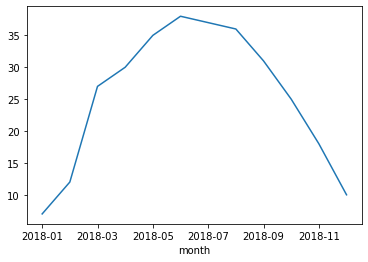

In [136]:
daytime_max_temp.plot()

In [137]:
data = df.groupby('month').agg(
    {
        'bWendu': np.max,
        'yWendu': np.min,
        'aqi': np.mean
    }
)
data

,bWendu,yWendu,aqi
month,,,
2018-01,7,-12,60.677419
2018-02,12,-10,78.857143
2018-03,27,-4,130.322581
2018-04,30,1,102.866667
2018-05,35,10,99.064516
2018-06,38,17,82.300000
2018-07,37,22,72.677419
2018-08,36,20,59.516129
2018-09,31,11,50.433333


<AxesSubplot:xlabel='month'>

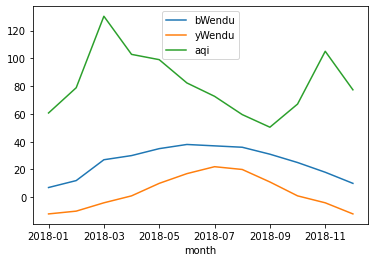

In [138]:
# 这里 pandad df 就是很方便的直接 multiple series, 来画图，本质上也是调 matplot 但是我记住这个 api 就很方便
data.plot()

_______________________

__Question__: how to aggregate by 3 columns on some key 
and then calculate something based on those 3 columns? because AUC by slices needs this? （后面有讲)

## Pandas Multi-Index Exercises

In [145]:
# why do we care about multi-index?


In [190]:
stocks = pd.read_excel('dataset/p3d_stocks.xlsx')

In [148]:
type(stocks)

pandas.core.frame.DataFrame

In [150]:
stocks.shape

(12, 8)

In [151]:
stocks.head()

,Date,Closing_Price,Opening_Price,Max,Min,Volume,Quote_Change,Company
0,2023-09-06,33.79,33.90,34.41,33.78,6.79M,-0.0137,JD
1,2023-09-05,34.26,33.72,34.34,33.54,7.29M,0.0047,JD
2,2023-09-01,34.10,33.85,34.95,33.80,11.91M,0.0268,JD
3,2023-09-06,141.86,141.84,144.62,141.50,1.04M,-0.0052,BIDU
4,2023-09-05,142.60,143.74,144.57,141.38,2.19M,-0.0264,BIDU


In [152]:
stocks['Company'].unique()

array(['JD', 'BIDU', 'BABA', 'IQ'], dtype=object)

In [153]:
stocks.index

RangeIndex(start=0, stop=12, step=1)

In [155]:
stocks.groupby('Company')['Closing_Price'].mean()

Company
BABA     94.703333
BIDU    143.643333
IQ        4.986667
JD       34.050000
Name: Closing_Price, dtype: float64

In [158]:
# Series 也可以 multi-index

ser = stocks.groupby(['Company', 'Date'])['Closing_Price'].mean()
ser

Company  Date      
BABA     2023-09-01     95.01
         2023-09-05     94.65
         2023-09-06     94.45
BIDU     2023-09-01    146.47
         2023-09-05    142.60
         2023-09-06    141.86
IQ       2023-09-01      5.11
         2023-09-05      4.95
         2023-09-06      4.90
JD       2023-09-01     34.10
         2023-09-05     34.26
         2023-09-06     33.79
Name: Closing_Price, dtype: float64

In [157]:
ser.index

MultiIndex([('BABA', '2023-09-01'),
            ('BABA', '2023-09-05'),
            ('BABA', '2023-09-06'),
            ('BIDU', '2023-09-01'),
            ('BIDU', '2023-09-05'),
            ('BIDU', '2023-09-06'),
            (  'IQ', '2023-09-01'),
            (  'IQ', '2023-09-05'),
            (  'IQ', '2023-09-06'),
            (  'JD', '2023-09-01'),
            (  'JD', '2023-09-05'),
            (  'JD', '2023-09-06')],
           names=['Company', 'Date'])

In [162]:
# 这里就是把 2nd index 变成 column 那么这个就变成 df 了
# 因为 unstack 就是逐渐降低索引层次
ser_unstacked = ser.unstack()
print(type(ser_unstacked))
ser_unstacked

<class 'pandas.core.frame.DataFrame'>


Date,2023-09-01,2023-09-05,2023-09-06
Company,,,
BABA,95.01,94.65,94.45
BIDU,146.47,142.60,141.86
IQ,5.11,4.95,4.90
JD,34.10,34.26,33.79


In [165]:
# 这直接变成 df
ser_unstacked.reset_index()

Date,Company,2023-09-01 00:00:00,2023-09-05 00:00:00,2023-09-06 00:00:00
0,BABA,95.01,94.65,94.45
1,BIDU,146.47,142.60,141.86
2,IQ,5.11,4.95,4.90
3,JD,34.10,34.26,33.79


In [173]:
# Series multi-index 赛选数据

In [184]:
type(ser)

pandas.core.series.Series

In [185]:
# Question: 这里跟上面的 get_group 啥不一样？
# Answer: 上面是 SeriesGroupBy or DataFrameGroupBy, 这里 type 是 Series
ser.loc[('BIDU', '2023-09-01')]

146.47

In [186]:
ser.loc[:,'2023-09-01']

Company
BABA     95.01
BIDU    146.47
IQ        5.11
JD       34.10
Name: Closing_Price, dtype: float64

In [177]:
### Dataframe 的 multi-index

In [178]:
stocks

,Date,Closing_Price,Opening_Price,Max,Min,Volume,Quote_Change,Company
0,2023-09-06,33.79,33.90,34.41,33.78,6.79M,-0.0137,JD
1,2023-09-05,34.26,33.72,34.34,33.54,7.29M,0.0047,JD
2,2023-09-01,34.10,33.85,34.95,33.80,11.91M,0.0268,JD
3,2023-09-06,141.86,141.84,144.62,141.50,1.04M,-0.0052,BIDU
4,2023-09-05,142.60,143.74,144.57,141.38,2.19M,-0.0264,BIDU
5,2023-09-01,146.47,145.45,151.00,145.17,2.99M,0.0255,BIDU
6,2023-09-06,94.45,94.15,95.80,94.15,9.75M,-0.0021,BABA
7,2023-09-05,94.65,94.53,95.39,94.07,9.88M,-0.0038,BABA
8,2023-09-01,95.01,94.55,96.68,94.52,17.47M,0.0227,BABA
9,2023-09-06,4.90,4.98,5.05,4.88,3.82M,-0.0101,IQ


In [191]:
# 这个就是直接在上面改 index 了, 改成 company and date 而且是inplace, 
# 就是原来的 df 被改了
stocks.set_index(['Company', 'Date'], inplace=True)

In [192]:
stocks

Closing_Price  Opening_Price     Max     Min  Volume  \
Company Date                                                               
JD      2023-09-06          33.79          33.90   34.41   33.78   6.79M   
        2023-09-05          34.26          33.72   34.34   33.54   7.29M   
        2023-09-01          34.10          33.85   34.95   33.80  11.91M   
BIDU    2023-09-06         141.86         141.84  144.62  141.50   1.04M   
        2023-09-05         142.60         143.74  144.57  141.38   2.19M   
        2023-09-01         146.47         145.45  151.00  145.17   2.99M   
BABA    2023-09-06          94.45          94.15   95.80   94.15   9.75M   
        2023-09-05          94.65          94.53   95.39   94.07   9.88M   
        2023-09-01          95.01          94.55   96.68   94.52  17.47M   
IQ      2023-09-06           4.90           4.98    5.05    4.88   3.82M   
        2023-09-05           4.95           5.08    5.18    4.92   6.20M   
        2023-09-01           5.11           5.09    5.50    5.09  11.56M   

                    Quote_Change  
Company Date                      
JD      2023-09-06       -0.0137  
        2023-09-05        0.0047  
        2023-09-01        0.0268  
BIDU    2023-09-06       -0.0052  
        2023-09-05       -0.0264  
        2023-09-01        0.0255  
BABA    2023-09-06       -0.0021  
        2023-09-05       -0.0038  
        2023-09-01        0.0227  
IQ      2023-09-06       -0.0101  
        2023-09-05       -0.0313  
        2023-09-01        0.0139

In [193]:
stocks.index

MultiIndex([(  'JD', '2023-09-06'),
            (  'JD', '2023-09-05'),
            (  'JD', '2023-09-01'),
            ('BIDU', '2023-09-06'),
            ('BIDU', '2023-09-05'),
            ('BIDU', '2023-09-01'),
            ('BABA', '2023-09-06'),
            ('BABA', '2023-09-05'),
            ('BABA', '2023-09-01'),
            (  'IQ', '2023-09-06'),
            (  'IQ', '2023-09-05'),
            (  'IQ', '2023-09-01')],
           names=['Company', 'Date'])

In [197]:
stocks_sorted = stocks.sort_index() # 这里还可以加一个 inplace=True 如果要在原本的上面改
# 这里就是把index 排好序
stocks_sorted

Closing_Price  Opening_Price     Max     Min  Volume  \
Company Date                                                               
BABA    2023-09-01          95.01          94.55   96.68   94.52  17.47M   
        2023-09-05          94.65          94.53   95.39   94.07   9.88M   
        2023-09-06          94.45          94.15   95.80   94.15   9.75M   
BIDU    2023-09-01         146.47         145.45  151.00  145.17   2.99M   
        2023-09-05         142.60         143.74  144.57  141.38   2.19M   
        2023-09-06         141.86         141.84  144.62  141.50   1.04M   
IQ      2023-09-01           5.11           5.09    5.50    5.09  11.56M   
        2023-09-05           4.95           5.08    5.18    4.92   6.20M   
        2023-09-06           4.90           4.98    5.05    4.88   3.82M   
JD      2023-09-01          34.10          33.85   34.95   33.80  11.91M   
        2023-09-05          34.26          33.72   34.34   33.54   7.29M   
        2023-09-06          33.79          33.90   34.41   33.78   6.79M   

                    Quote_Change  
Company Date                      
BABA    2023-09-01        0.0227  
        2023-09-05       -0.0038  
        2023-09-06       -0.0021  
BIDU    2023-09-01        0.0255  
        2023-09-05       -0.0264  
        2023-09-06       -0.0052  
IQ      2023-09-01        0.0139  
        2023-09-05       -0.0313  
        2023-09-06       -0.0101  
JD      2023-09-01        0.0268  
        2023-09-05        0.0047  
        2023-09-06       -0.0137

---------------

Data multi-index 怎么filter数据？ 

- 这里有用 tuple (key1值, key2值) 的 loc 选法，这个是指第一 index 和第二 index 对应的我们 filter 的key1 and key2 值
- 然后还有用 list [key1, key2] 的 loc 选法， 这里 key1 and key2 是同级 index



In [198]:
stocks.loc['BIDU']

,Closing_Price,Opening_Price,Max,Min,Volume,Quote_Change
Date,,,,,,
2023-09-06,141.86,141.84,144.62,141.50,1.04M,-0.0052
2023-09-05,142.60,143.74,144.57,141.38,2.19M,-0.0264
2023-09-01,146.47,145.45,151.00,145.17,2.99M,0.0255


In [200]:
# 这个就是多层 index filter 之后，选全部的column
stocks.loc[('BIDU', '2023-09-05'), :]

Closing_Price     142.6
Opening_Price    143.74
Max              144.57
Min              141.38
Volume            2.19M
Quote_Change    -0.0264
Name: (BIDU, 2023-09-05 00:00:00), dtype: object

In [202]:
# 当然，也可以 multi-index filter 之后，选某一个column  (loc 第一个位置是 row, 第二个位置是 column)
stocks.loc[('BIDU', '2023-09-05'), 'Opening_Price']

143.74

In [205]:
# 在同一个 index 里面进行 filter, 
stocks.loc[['BIDU', 'JD'], :]

Closing_Price  Opening_Price     Max     Min  Volume  \
Company Date                                                               
BIDU    2023-09-06         141.86         141.84  144.62  141.50   1.04M   
        2023-09-05         142.60         143.74  144.57  141.38   2.19M   
        2023-09-01         146.47         145.45  151.00  145.17   2.99M   
JD      2023-09-06          33.79          33.90   34.41   33.78   6.79M   
        2023-09-05          34.26          33.72   34.34   33.54   7.29M   
        2023-09-01          34.10          33.85   34.95   33.80  11.91M   

                    Quote_Change  
Company Date                      
BIDU    2023-09-06       -0.0052  
        2023-09-05       -0.0264  
        2023-09-01        0.0255  
JD      2023-09-06       -0.0137  
        2023-09-05        0.0047  
        2023-09-01        0.0268

In [208]:
# 还可以混合的, fitler by 1st index two values 
# and then filter by 2nd index by one value
stocks.loc[(['BIDU', 'JD'], '2023-09-06'), :]

,,Closing_Price,Opening_Price,Max,Min,Volume,Quote_Change
Company,Date,,,,,,
BIDU,2023-09-06,141.86,141.84,144.62,141.50,1.04M,-0.0052
JD,2023-09-06,33.79,33.90,34.41,33.78,6.79M,-0.0137


In [214]:
# slice(None)表示我的第一个 index 我全要，不做 filtering,
# 这样我只 filter 第二个 index
stocks.loc[(slice(None), ['2023-09-05', '2023-09-06']), :]

,,Closing_Price,Opening_Price,Max,Min,Volume,Quote_Change
Company,Date,,,,,,
JD,2023-09-05,34.26,33.72,34.34,33.54,7.29M,0.0047
BIDU,2023-09-05,142.60,143.74,144.57,141.38,2.19M,-0.0264
BABA,2023-09-05,94.65,94.53,95.39,94.07,9.88M,-0.0038
IQ,2023-09-05,4.95,5.08,5.18,4.92,6.20M,-0.0313
JD,2023-09-06,33.79,33.90,34.41,33.78,6.79M,-0.0137
BIDU,2023-09-06,141.86,141.84,144.62,141.50,1.04M,-0.0052
BABA,2023-09-06,94.45,94.15,95.80,94.15,9.75M,-0.0021
IQ,2023-09-06,4.90,4.98,5.05,4.88,3.82M,-0.0101


In [215]:
# 这下又变回来
stocks.reset_index()

,Company,Date,Closing_Price,Opening_Price,Max,Min,Volume,Quote_Change
0,JD,2023-09-06,33.79,33.90,34.41,33.78,6.79M,-0.0137
1,JD,2023-09-05,34.26,33.72,34.34,33.54,7.29M,0.0047
2,JD,2023-09-01,34.10,33.85,34.95,33.80,11.91M,0.0268
3,BIDU,2023-09-06,141.86,141.84,144.62,141.50,1.04M,-0.0052
4,BIDU,2023-09-05,142.60,143.74,144.57,141.38,2.19M,-0.0264
5,BIDU,2023-09-01,146.47,145.45,151.00,145.17,2.99M,0.0255
6,BABA,2023-09-06,94.45,94.15,95.80,94.15,9.75M,-0.0021
7,BABA,2023-09-05,94.65,94.53,95.39,94.07,9.88M,-0.0038
8,BABA,2023-09-01,95.01,94.55,96.68,94.52,17.47M,0.0227
9,IQ,2023-09-06,4.90,4.98,5.05,4.88,3.82M,-0.0101


## Pandas  map - apply - applymap 练习

1. map examples (只可以直接对 series 用)

In [255]:
stocks = pd.read_excel('dataset/p3d_stocks.xlsx')

In [217]:
stocks['Company'].unique()

array(['JD', 'BIDU', 'BABA', 'IQ'], dtype=object)

In [256]:
stocks.dtypes

Date             datetime64[ns]
Closing_Price           float64
Opening_Price           float64
Max                     float64
Min                     float64
Volume                   object
Quote_Change            float64
Company                  object
dtype: object

In [218]:
company_map = {
    'JD': 'jingdong',
    'BIDU': 'baidu',
    'BABA': 'alibaba',
    'IQ': 'aiqiyi'
}

In [220]:
stocks['CompanyName'] = stocks['Company'].apply(lambda x: company_map[x])

In [221]:
stocks[['Company','CompanyName']]

,Company,CompanyName
0,JD,jingdong
1,JD,jingdong
2,JD,jingdong
3,BIDU,baidu
4,BIDU,baidu
5,BIDU,baidu
6,BABA,alibaba
7,BABA,alibaba
8,BABA,alibaba
9,IQ,aiqiyi


-----------------

2. apply method examples (可以对 series 或 dataframe 用)
  - __那我以后直接都用 apply 不就行了吗!!__
  - __所以还是 apply 最好用的!!!__

In [267]:
# 这里其实跟 Map 很像，只是多了一个 axis = 1 表示我们 apply 的是 column level (0 表示 row, 1 表示 col)
# axis=1 的意思是 x 是指 column
stocks['Company_Name'] = stocks.apply(
    lambda x: company_map[x['Company']],
    axis = 1
)

In [246]:
stocks

,Date,Closing_Price,Opening_Price,Max,Min,Volume,Quote_Change,Company,Company_Name
0,2023-09-06,33.79,33.90,34.41,33.78,6.79M,-0.0137,JD,jingdong
1,2023-09-05,34.26,33.72,34.34,33.54,7.29M,0.0047,JD,jingdong
2,2023-09-01,34.10,33.85,34.95,33.80,11.91M,0.0268,JD,jingdong
3,2023-09-06,141.86,141.84,144.62,141.50,1.04M,-0.0052,BIDU,baidu
4,2023-09-05,142.60,143.74,144.57,141.38,2.19M,-0.0264,BIDU,baidu
5,2023-09-01,146.47,145.45,151.00,145.17,2.99M,0.0255,BIDU,baidu
6,2023-09-06,94.45,94.15,95.80,94.15,9.75M,-0.0021,BABA,alibaba
7,2023-09-05,94.65,94.53,95.39,94.07,9.88M,-0.0038,BABA,alibaba
8,2023-09-01,95.01,94.55,96.68,94.52,17.47M,0.0227,BABA,alibaba
9,2023-09-06,4.90,4.98,5.05,4.88,3.82M,-0.0101,IQ,aiqiyi


--------------------------------
3. applymap method 的例子
  - 这个是一次性 apply 多个 column

In [248]:
# 把结尾这个 M （e.g: 6.79M) 给去掉)
stocks['Volume'] = stocks['Volume'].str[:-1].apply(lambda x: float(x) * 1e6)

In [249]:

sub_df = stocks[['Closing_Price', 'Opening_Price', 'Max', 'Min', 'Volume']]

In [250]:
sub_df.head(2)

,Closing_Price,Opening_Price,Max,Min,Volume
0,33.79,33.90,34.41,33.78,6790000.0
1,34.26,33.72,34.34,33.54,7290000.0


In [252]:
# 转成 int， 这里 applymap 是对 selected df 里面所有的 nuber
sub_df.applymap(lambda x: int(x)).head(2)

,Closing_Price,Opening_Price,Max,Min,Volume
0,33,33,34,33,6790000
1,34,33,34,33,7290000


## Pandas  apply on DataFrameGroup 练习

下图是解释 apply on groupby 的实际上底层的三步
(__这个图，从后面看，真的太好了!!!__)

<img src="pandas_groupby_apply_img.png" alt="pandas group by apply image" style="height: 400px; width:600px;"/>

Example1: number normalization on different groups (a common approach on ML feature pre-processing)

这里就是 movie lens data 我们要对每个人的 rating 做一个 normalization 这样就不会收到每个用户
自己 subjectivity 的影响

<img src="normalization_formula_img.png" alt="normalization_formula_img" style="height: 300px; width:500px;"/>

In [285]:
df_ratings = pd.read_csv(
    'dataset/ml-1m/ratings.dat',
    sep='::',
    engine='python',
    names='UserId::MovieId::Rating::TS'.split("::")
)

In [286]:
df_ratings.head(2)

,UserId,MovieId,Rating,TS
0,1,1193,5,978300760
1,1,661,3,978302109


In [287]:
# 对用户rating 进行 normalization， 注意这里虽然是给一 groupby 用，但是 input 是 df
# 这里其实穿进去的 df ， 就是就是上面那个底层三步图的 Split 之后的每个 group 的 DF
# 然后input 是每个 sub-df 然后 output 是每个 sub-df rollup 之后的版本 (可以是 1 row 也可以是 
# 多个row, 比如下面 get topk at each group 的例子)
# 然后拼接起来
def rating_norm(df):
    min_val = df['Rating'].min()
    max_val = df['Rating'].max()    
    
    # 这里不用写 axis = 1 因为 我们选了就是一个 series
    df['Rating_Norm'] = df['Rating'].apply(
        lambda x: (x-min_val) / (max_val-min_val)        
    )
    
    # 也可以这样写，那么就要写 axis 但是这个跑的会慢一些
#     df['Rating_Norm'] = df.apply(
#         lambda x: (x['Rating']-min_val) / (max_val-min_val), 
#         axis=1
#     )
    
    return df
    

In [288]:
norm_ratings = df_ratings.groupby('UserId').apply(rating_norm)

In [289]:
# 检查一下 (这个 expect [0,1])
norm_ratings['Rating_Norm'].agg(['min', 'max'])

min    0.0
max    1.0
Name: Rating_Norm, dtype: float64

In [290]:
# 检查下
norm_ratings.groupby('UserId')['Rating_Norm'].agg(['min', 'mean', 'max'])

,min,mean,max
UserId,,,
1,0.0,0.594340,1.0
2,0.0,0.678295,1.0
3,0.0,0.725490,1.0
4,0.0,0.797619,1.0
5,0.0,0.536616,1.0
...,...,...,...
6036,0.0,0.575732,1.0
6037,0.0,0.679455,1.0
6038,0.0,0.700000,1.0


------------

Example 2: Obtain Top 2 temperature of each month (这个也是一个很常见的场景)

In [291]:
!ls

Advanced Pandas Exercise.ipynb normalization_formula_img.png
beijing_tianqi_2018.csv        pandas_groupby_apply_img.png
dataset                        pandas_img.png


In [292]:
df = pd.read_csv('beijing_tianqi_2018.csv')

In [293]:
df['bWendu'] = df['bWendu'].str.replace("℃", "").astype('int32')
df['yWendu'] = df['yWendu'].str.replace("℃", "").astype('int32')

In [294]:
df.head(3)

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1


In [296]:
df['month'] = df['ymd'].str[:7]

In [317]:
# 这里就是回顾一下 dataframe 的slicing, 可以是 df[<row_range>][[columns]]
# df[2:3][['ymd', 'bWendu']]

# # 也可以是 df.loc[<row_range>, [columns]
# 这里不太一样的，就是 3 这个好像不是exclude
df.loc[2:3, ['ymd', 'bWendu']]

,ymd,bWendu
2,2018-01-03,2
3,2018-01-04,0


In [318]:
def get_topn(df, topn, sort_by): 
    '''
        get topn of bWendu and yWendu (input is already grouped by month)
    '''
    
    # get top n. sort_value is ascending, so we get topn is the same as -n from bottom
    
    return df.sort_values(by=sort_by)[['ymd', sort_by]][-topn:]
    

In [320]:
# 这个例子，还说明了， apply function 这个写法，我的 function 的parameter
# 传进去，是在 apply(func_name, <param...>) 这样传的

df.groupby('month').apply(get_topn, topn=2, sort_by='bWendu').head(10)

ymd  bWendu
month                          
2018-01 13   2018-01-14       6
        18   2018-01-19       7
2018-02 53   2018-02-23      10
        56   2018-02-26      12
2018-03 86   2018-03-28      25
        85   2018-03-27      27
2018-04 109  2018-04-20      28
        118  2018-04-29      30
2018-05 133  2018-05-14      34
        150  2018-05-31      35

--------------------------

## Pandas Stack and Pivot 例子

<img src="pandas_pivot_and_stack_img.png" alt="pandas group by apply image" style="height: 400px; width:700px;"/>

- 大数据的存储，一般是左边这只 column based multi-index 的，因为方便storage. 但是这个其实分析和画图起来不好弄。 
- 我们希望转成像右边这样，又有 column 又有 row based 的 index, 容易画图, 也容易分析


In [321]:
df_ratings = pd.read_csv(
    'dataset/ml-1m/ratings.dat',
    sep='::',
    engine='python',
    names='UserId::MovieId::Rating::TS'.split("::")
)

In [322]:
# 比如这我们想要得到 每个月份， 每个分数，被评分了多少次

In [325]:
df_ratings.head(2)

,UserId,MovieId,Rating,TS
0,1,1193,5,978300760
1,1,661,3,978302109


In [326]:
df_ratings['date'] = pd.to_datetime(df_ratings['TS'], unit='s')

In [327]:
df_ratings.head(2)

,UserId,MovieId,Rating,TS,date
0,1,1193,5,978300760,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09


In [328]:
df_ratings.dtypes

UserId              int64
MovieId             int64
Rating              int64
TS                  int64
date       datetime64[ns]
dtype: object

In [368]:
# 这边有几个有趣的的点可以学:
# 1. 一个是这里的 .dt. 
#   Series.dt can be used to access the values of the series as datetimelike and return several propertie
#   记得之前 有个类似的叫做 str
# 2. 还有就是， 你发现 agg 之后，你如果要直接 name 你的 agg column 可以 <agg_col_name> = np.sum 这样写


# Question: 这里还是很奇怪， 我gorup by date and rating 然后 select user_id, 
#   然后我直接 sum?? what? 我觉得应该改成 count 才对, 因为我们要求的是“每个月份， 每个分数，被评分了多少次”

df_group = df_ratings \
    .groupby([df_ratings['date'].dt.month, 'Rating'])['UserId'] \
    .agg(rating_freq='count')

df_group.head(5)

rating_freq
date Rating             
1    1              1127
     2              2608
     3              6442
     4              8400
     5              4495

In [369]:
# Question: how do I rename the 'date' index to month since it's month??
# Answer: 就是直接对 index 硬改好想可以. 因为如果你 rename index， 你其实不是去改 index 
#  这个 column 的值 比如 'date'， 而是去改 date 对应的 row  的值，这个就不是我要的了
df_group.index.names = ['month', 'Rating']
df_group.head(5)

rating_freq
month Rating             
1     1              1127
      2              2608
      3              6442
      4              8400
      5              4495

In [370]:
# 当然， 上面这个 2-level index 格式，还是不适合画图，因为我们需要 multi-series 图，比如 x-axis is month
# y-axis is count, and series is each rating 那么就要改 table

In [376]:
# 这里可以用 unstack, 这个就很类似 pivot table 了
df_stack = df_group.unstack()

# 这样 pivot 完之后，就可以看到， 第一个 column (index) 是 x-axis, 然后， 第二个 column onward
# 里面每个值， 是 y-axis, 然后每个 column 是一个 series
# 09/28/2023 revist: 知道上面这个 column to plot mapping turn out to be super helpful!!
df_stack

rating_freq                             
Rating           1      2      3       4      5
month                                          
1             1127   2608   6442    8400   4495
2              629   1464   3297    4403   2335
3              466   1077   2523    3032   1439
4             1048   2247   5501    6748   3863
5             4557   7631  18481   25769  17840
6             3196   6500  15211   21838  14365
7             4891   9566  25421   34957  22169
8            10873  20597  50509   64198  42497
9             3107   5873  14702   19927  13182
10            2121   4785  12175   16095  10324
11           17701  32202  76069  102448  67041
12            6458  13007  30866   41156  26760

<AxesSubplot:xlabel='month'>

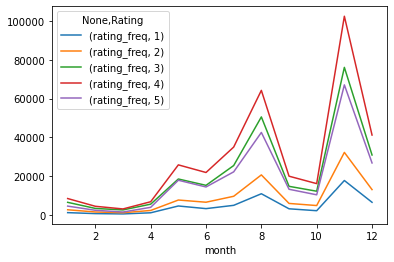

In [374]:
df_stack.plot()

In [377]:
# stack and unstack 是反向操作
# From pandas official doc: 
# - unstack: "Pivot a level of the (necessarily hierarchical) index labels."

df_stack.stack().head(20)

rating_freq
month Rating             
1     1              1127
      2              2608
      3              6442
      4              8400
      5              4495
2     1               629
      2              1464
      3              3297
      4              4403
      5              2335
3     1               466
      2              1077
      3              2523
      4              3032
      5              1439
4     1              1048
      2              2247
      3              5501
      4              6748
      5              3863

------------

Pivot Example

In [378]:
# 先 reset_index 回到原来格式

df_reset = df_group.reset_index()
df_reset.head()

,month,Rating,rating_freq
0,1,1,1127
1,1,2,2608
2,1,3,6442
3,1,4,8400
4,1,5,4495


In [383]:
# pivot 也可以做到类似上面的效果, 它这里叫做 2-d cross dimension, 一个 index 是vertical 一个 index 是 horizontal, 然后一个是value

df_pivot = df_reset.pivot(
    index='month', 
    columns='Rating', 
    values='rating_freq')
df_pivot.head(5)

Rating,1,2,3,4,5
month,,,,,
1,1127,2608,6442,8400,4495
2,629,1464,3297,4403,2335
3,466,1077,2523,3032,1439
4,1048,2247,5501,6748,3863
5,4557,7631,18481,25769,17840


<AxesSubplot:xlabel='month'>

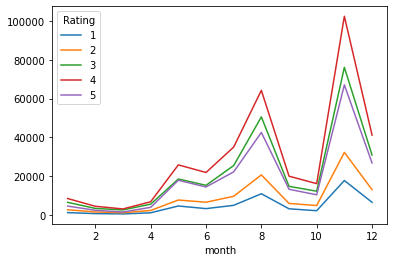

In [384]:
df_pivot.plot()

--------------------

下面有个图示讲的非常好!!!

- 你看其实也很形象， stack 就是竖叠起来， 然后 unstack 就是比如这里把 A,B,A,B 这个 index column 给从叠起来的变成横过来

<img src="pandas_unstack_img.png" alt="pandas group by apply image" style="height: 400px; width:700px;"/>

<img src="pandas_stack_img.png" alt="pandas group by apply image" style="height: 400px; width:700px;"/>

<img src="pandas_pivot_img.png" alt="pandas group by apply image" style="height: 400px; width:700px;"/>